In [88]:
import pandas as pd
import datetime as dt
from prophet import Prophet
%matplotlib inline

In [89]:
from google.colab import files
uploaded = files.upload()

Saving population(1).csv to population(1) (6).csv


In [90]:
# read in population csv
pop_df = pd.read_csv('population(1).csv', parse_dates=['Year'])
pop_df

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
0,Afghanistan,1950-01-01,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,255563,211607,161196,110709,64310,28381,8153,1346,115,8
1,Afghanistan,1951-01-01,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,256915,211966,161821,111465,65210,29148,8672,1483,109,9
2,Afghanistan,1952-01-01,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,258952,211946,162710,112142,66123,29903,9137,1584,129,10
3,Afghanistan,1953-01-01,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,261238,211731,163777,112800,67058,30647,9561,1693,155,11
4,Afghanistan,1954-01-01,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,263301,211816,164736,113474,67953,31345,9963,1830,179,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,Zimbabwe,2017-01-01,14751101,464521.0,2287404,6217928,9224369,8056253,8532951,7476399,...,304660,266109,260767,207008,128210,72717,38708,21081,7460,1514
18284,Zimbabwe,2018-01-01,15052191,466524.0,2283576,6291632,9385132,8264833,8760331,7689502,...,320980,264549,258302,217912,131756,76831,39082,20618,7725,1574
18285,Zimbabwe,2019-01-01,15354606,468844.0,2281740,6367398,9543409,8473475,8986973,7909270,...,341030,265236,254977,224850,137699,81064,40180,20159,7895,1651
18286,Zimbabwe,2020-01-01,15669663,470340.0,2287105,6449021,9709135,8691594,9220402,8139472,...,363178,268363,250478,226029,146547,85057,41839,19707,7911,1718


In [91]:
# filter to only show Mexico
mexico_pop_df = pop_df[pop_df['Country name'] == 'Mexico']
mexico_pop_df

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
10584,Mexico,1950-01-01,27600140,1203354.0,5130406,12182375,17371222,14593009,15417717,13732598,...,812101,603410,494656,340161,222055,141233,81136,31921,7325,877
10585,Mexico,1951-01-01,28328022,1228071.0,5299502,12586963,17877982,14899594,15740901,14024900,...,843859,617558,495601,350454,223964,140013,81182,34449,9527,1718
10586,Mexico,1952-01-01,29061668,1261928.0,5460715,13002795,18392358,15195336,16058583,14306372,...,870538,638408,495075,360497,226840,140135,82384,38151,12454,2786
10587,Mexico,1953-01-01,29822098,1294733.0,5608326,13436848,18927050,15499134,16384843,14590473,...,894323,663533,496312,370130,230359,141055,83639,41585,15179,3762
10588,Mexico,1954-01-01,30616898,1327960.0,5755429,13884289,19490026,15823312,16732090,14887442,...,915437,690740,500208,378465,235036,142944,85260,44646,17748,4679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,Mexico,2017-01-01,122839256,2085377.9,10701348,32753948,54249990,80964830,90072696,83463670,...,6323832,5246351,4191251,3159701,2277059,1634489,1073315,609452,273364,80483
10652,Mexico,2018-01-01,124013864,2028545.0,10533454,32485134,53960000,82019096,91517720,84924024,...,6515993,5421540,4366036,3319805,2374983,1684082,1112752,635735,285788,85480
10653,Mexico,2019-01-01,125085310,1967239.0,10327001,32194366,53653636,83031840,92881420,86308360,...,6706355,5594358,4532563,3475817,2472992,1732923,1145411,649086,288027,85325
10654,Mexico,2020-01-01,125998296,1942516.0,10115308,31923940,53397188,83967736,94065096,87509800,...,6874432,5750358,4668859,3602154,2559015,1766707,1159833,646846,281677,81128


In [92]:
# remove columns except year and population to set up for 'ds' and 'y'
mexico_pop_df = mexico_pop_df.loc[:, ['Year', 'Population']]
mexico_pop_df

,Year,Population
10584,1950-01-01,27600140
10585,1951-01-01,28328022
10586,1952-01-01,29061668
10587,1953-01-01,29822098
10588,1954-01-01,30616898
...,...,...
10651,2017-01-01,122839256
10652,2018-01-01,124013864
10653,2019-01-01,125085310
10654,2020-01-01,125998296


In [93]:
# rename columns for prophet
mexico_pop_df = mexico_pop_df.rename(columns={'Year': 'ds', 'Population': 'y'})
mexico_pop_df

,ds,y
10584,1950-01-01,27600140
10585,1951-01-01,28328022
10586,1952-01-01,29061668
10587,1953-01-01,29822098
10588,1954-01-01,30616898
...,...,...
10651,2017-01-01,122839256
10652,2018-01-01,124013864
10653,2019-01-01,125085310
10654,2020-01-01,125998296


In [94]:
mexico_pop_df['ds'] = pd.to_datetime(mexico_pop_df['ds'])

In [95]:
mexico_pop_df['ds'].dtype

dtype('<M8[ns]')

In [96]:
# create prophet object and fit data
prophet_model = Prophet()
prophet_model.fit(mexico_pop_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7s9eq44t/4tngmfgk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7s9eq44t/p_je97pj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89989', 'data', 'file=/tmp/tmp7s9eq44t/4tngmfgk.json', 'init=/tmp/tmp7s9eq44t/p_je97pj.json', 'output', 'file=/tmp/tmp7s9eq44t/prophet_modelpchdc6iu/prophet_model-20240508030828.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:08:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:08:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


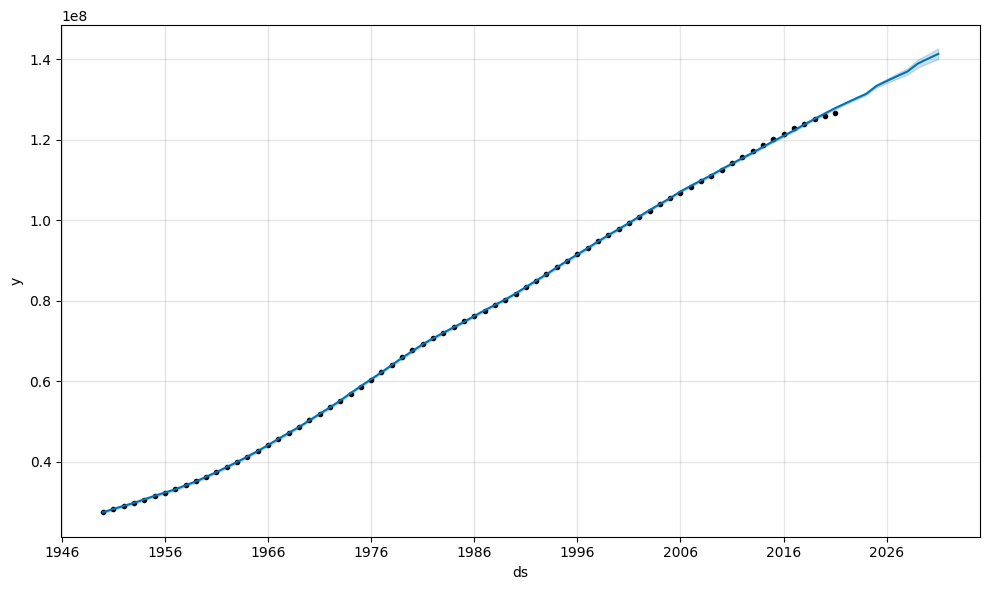

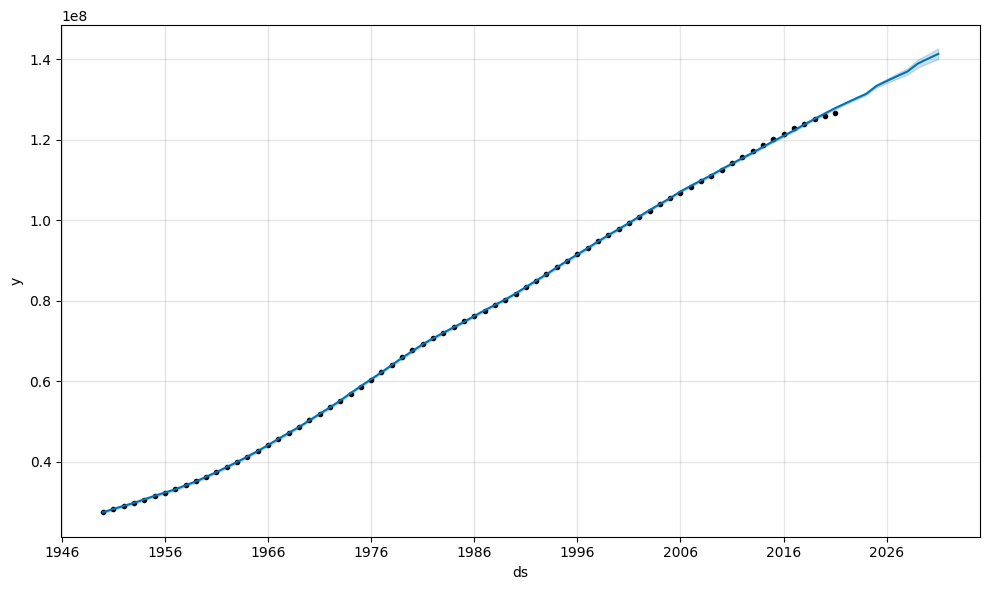

In [97]:
# Create a future dataframe for forecasting

future = prophet_model.make_future_dataframe(periods=10, freq='Y')

# Make predictions
forecast = prophet_model.predict(future)

# Plot the forecast
prophet_model.plot(forecast)
